# Appendix B1: Models without compensation
**Appendix B discusses and compares patch clamp model equations**

Based on the discussion in [Appendix A3](./appendix-A3-non-ideal-op-amp.ipynb) we now look at models of uncompensated patch clamp, with voltage offset and leak current omitted for simplicity.

<img src="./resources/patch-amp-6-cell-Iin.png" />

We now write an equation for the voltage at every junction, starting bottom left:

\begin{align}
1. && C_m\dot{V}_m = \frac{V_p - V_m}{R_s} - I
\end{align}

where $I$ is the non-capacitative current through the cell membrane.

Next,

\begin{align}
C_p\dot{V}_p = \frac{V_o-V_p}{R_f} + C_f\left(\dot{V}_o-\dot{V}_p\right) - \frac{V_p-V_m}{R_s}
\end{align}

which can be used as a differential equation for either $V_p$

\begin{align}
2a. && (C_p + C_f)\dot{V}_p = \frac{V_o-V_p}{R_f} + C_f\dot{V}_o - \frac{V_p-V_m}{R_s}
\end{align}
or $V_o$
\begin{align}
2b. && C_f\dot{V}_o = \frac{V_p-V_o}{R_f} + \left(C_p+C_f\right)\dot{V}_p + \frac{V_p-V_m}{R_s}
\end{align}

Next, we have two options for an op-amp equation:

\begin{align}
3a. && \tau_a\dot{V}_o = V_c - V_p \\
3b. && \tau_c\dot{V}_p = V_c - V_p \\
\end{align}

where $V_c$ is the command voltage.
The value $\tau_c$ is either a constant (80 nanoseconds) or $\tau_c = \tau_aC_t/C_f$.

And finally

\begin{align}
4a. && R_f I_\text{obs} \equiv V_\text{out} = V_o - V_c
\end{align}

This gives us two models: **(1, 2a, 3a, 4)** and **(1, 2b, 3b, 4)**.

## Lei-style model

The model used in Lei et al. (2020) also starts from

\begin{align}
1. && C_m\dot{V}_m = \frac{V_p - V_m}{R_s} - I && \text{(Equation S2.10)}
\end{align}

and 

\begin{align}
3b. && \tau_c\dot{V}_p = V_c - V_p && \text{(Equation S2.12)}
\end{align}

but then adds the relationship 
\begin{align}
5. && R_fC_f \dot{I}_\text{obs} = I + C_m\dot{V}_m + C_p\dot{V}_p - I_\text{obs} && \text{(Equation S2.8, S2.5)}
\end{align}

resulting in a model (1, 3b, 5).

Using equation 4a, we can rewrite this as an ODE for $V_o$:

\begin{align}
C_f(\dot{V}_o - \dot{V}_c) &= I + C_m\dot{V}_m + C_p\dot{V}_p - \frac{V_o - V_c}{R_f} \\
    &= \frac{V_p - V_m}{R_s} + C_p\dot{V}_p - \frac{V_o - V_c}{R_f} \\
\end{align}

\begin{align}
2c. && C_f\dot{V}_o = \frac{V_c - V_o}{R_f} + C_p\dot{V}_p + C_f\dot{V}_c + \frac{V_p - V_m}{R_s}
\end{align}

for an equivalent formulation (1, 2c, 3b, 4a).

Comparing to
\begin{align}
2b. && C_f\dot{V}_o = \frac{V_p-V_o}{R_f} + \left(C_p+C_f\right)\dot{V}_p + \frac{V_p-V_m}{R_s}
\end{align}

we see that the two are equal when $V_c = V_p$ and $\dot{V}_c = \dot{V}_p$ (so if we have a perfect op-amp, but some other filtering on the output).

### Alternative formulation

Alternatively, we can define

\begin{align}
4b. && R_f I_\text{obs} = V_o - V_p
\end{align}

with which we can derive 2b. from equations S2.8, S2.5, and S2.10:

\begin{align}
R_f C_f \dot{I}_\text{obs} &= I_\text{in} - I_\text{obs} \\
 &= I + C_m \dot{V}_m + C_p \dot{V}_p - I_\text{obs} \\
 &= \frac{V_p - V_m}{R_s} + C_p \dot{V}_p - I_\text{obs} \\
C_f (\dot{V}_o - \dot{V}_p) &= \frac{V_p - V_m}{R_s} + C_p \dot{V}_p - \frac{V_o - V_p}{R_f} \\
C_f \dot{V}_o &= \frac{V_p - V_m}{R_s} + \frac{V_p - V_o}{R_f} + (C_p + C_f) \dot{V}_p
\end{align}

so that we can write the same model as **(1, 2b, 3b, 4b)**.

## Three models

Summarising:

\begin{align}
1. && C_m\dot{V}_m = \frac{V_p - V_m}{R_s} - I
\end{align}

\begin{align}
2a. && (C_p + C_f)\dot{V}_p &= \frac{V_o-V_p}{R_f} + \frac{V_m-V_p}{R_s} + C_f\dot{V}_o \\
2b. && C_f\dot{V}_o &= \frac{V_p-V_o}{R_f} + \frac{V_p-V_m}{R_s} + \left(C_p+C_f\right)\dot{V}_p
\end{align}

\begin{align}
3a. && \tau_a\dot{V}_o = V_c - V_p \\
3b. && \tau_c\dot{V}_p = V_c - V_p \\
\end{align}

\begin{align}
4a. && R_f I_\text{obs} = V_o - V_c \\
4b. && R_f I_\text{obs} = V_o - V_p
\end{align}

From the above, we can distill three models:

- **Model A** - A "Sigworth-style" model **(1, 2a, 3a, 4a)**.
- **Model B** - A hybrid model **(1, 2b, 3b, 4a)**
- **Model C** - A "Lei-style" model **(1, 2b, 3b, 4b)**

## Simulations

We now run simulations for a single step from 0 to 10 mV, using the parameter values given in [appendix C2](./appendix-C2-parameter-defaults.ipynb).

### Model A (1, 2a, 3a, 4a)

In [1]:
import myokit

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mA = myokit.parse_model('''
[[model]]
amp.Vm = -80 [mV]
amp.Vp = -80 [mV]
amp.Vo = -80 [mV]

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
Rs = 15e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cp = 5 [pF] in [pF]
Rf = 0.5 [GOhm] in [GOhm]
Cf = 0.15 [pF] in [pF]
tau_amp = 20e-6 [ms] in [ms]
I = 5 [nS] * Vm
    in [pA]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Equation 1
    in [mV]
dot(Vp) = ((Vo - Vp) / Rf + Cf * dot(Vo) - (Vp - Vm) / Rs) / (Cf + Cp) : Equation 2a
    in [mV]
dot(Vo) = (Vc - Vp) / tau_amp : Equation 3a
    in [mV]
I_obs = (Vo - Vc) / Rf : Equation 4a
    in [pA]
''')
mA.check_units(myokit.UNIT_STRICT)

In [3]:
vlo, vhi = -80, 20
p = myokit.Protocol()
p.add_step(level=vlo, duration=5)
p.add_step(level=vhi, duration=10)
p.add_step(level=vlo, duration=10)

In [4]:
tol = 1e-8
dt = 5e-5

sA = myokit.Simulation(mA, p)
sA.set_tolerance(tol, tol)
sA.pre(5)
dA = sA.run(20, log_interval=dt).npview()

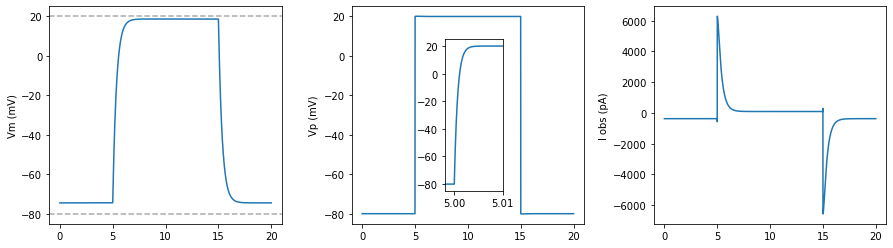

In [5]:
kw = dict(color='#aaa', ls='--')

fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.axhline(vlo, **kw)
ax.axhline(vhi, **kw)
ax.plot(dA.time(), dA['amp.Vm'])

ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dA.time(), dA['amp.Vp'])
ax = ax.inset_axes((0.4, 0.15, 0.25, 0.7))
ax.plot(dA.time(), dA['amp.Vp'])
ax.set_xlim(4.998, 5.01)

ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dA['amp.I_obs'])

plt.show()

### Model B (1, 2b, 3b, 4a)

In [6]:
mB = myokit.parse_model('''
[[model]]
amp.Vm = -80 [mV]
amp.Vp = -80 [mV]
amp.Vo = -80 [mV]

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
Rs = 15e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cp = 5 [pF] in [pF]
Rf = 0.5 [GOhm] in [GOhm]
Cf = 0.15 [pF] in [pF]
tau_amp = 20e-6 [ms] in [ms]
tau_c = tau_amp * (Cf + Cp) / Cf
    in [ms]
I = 5 [nS] * Vm
    in [pA]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Equation 1
    in [mV]
dot(Vo) = (Vp - Vo) / (Rf * Cf) + (Cp + Cf) / Cf * dot(Vp) + (Vp - Vm) / (Rs * Cf) : Equation 2b
    in [mV]
dot(Vp) = (Vc - Vp) / tau_c : Equation 3b
    in [mV]
I_obs = (Vo - Vc) / Rf : Equation 4a
    in [pA]
''')
mB.check_units(myokit.UNIT_STRICT)

In [7]:
sB = myokit.Simulation(mB, p)
sB.set_tolerance(tol, tol)
sB.pre(5)
dB = sB.run(20, log_interval=dt).npview()

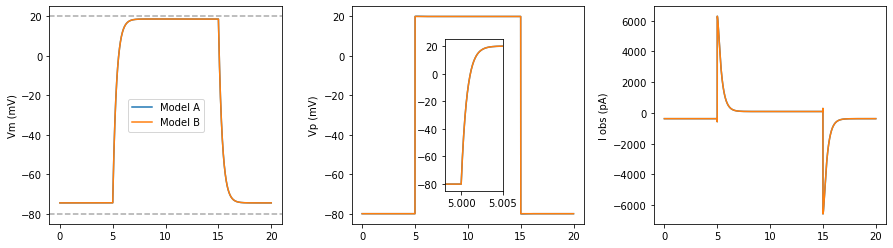

In [8]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.axhline(vlo, **kw)
ax.axhline(vhi, **kw)
ax.plot(dA.time(), dA['amp.Vm'], label='Model A')
ax.plot(dB.time(), dB['amp.Vm'], label='Model B')
ax.legend()

ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dA.time(), dA['amp.Vp'], label='Model A')
ax.plot(dB.time(), dB['amp.Vp'], label='Model B')
ax = ax.inset_axes((0.4, 0.15, 0.25, 0.7))
ax.plot(dA.time(), dA['amp.Vp'], label='Model A')
ax.plot(dB.time(), dB['amp.Vp'], label='Model B')
ax.set_xlim(4.998, 5.005)

ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dA['amp.I_obs'], label='Model A')
ax.plot(dB.time(), dB['amp.I_obs'], label='Model B')
plt.show()

Both models make very similar predictions, but we can subtract the two models to see the difference:

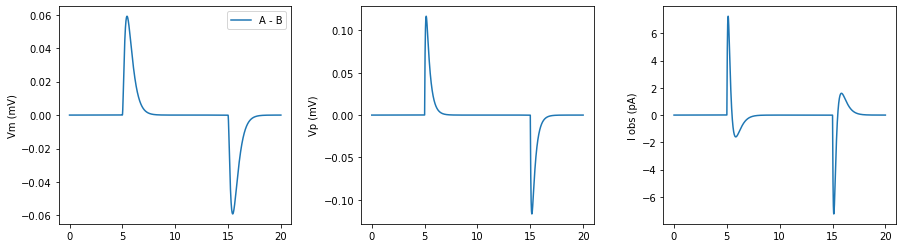

In [9]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.3)
ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.plot(dA.time(), dA['amp.Vm'] - dB['amp.Vm'], label='A - B')
ax.legend()
ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dA.time(), dA['amp.Vp'] - dB['amp.Vp'], label='A - B')
ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dA['amp.I_obs'] - dB['amp.I_obs'], label='A - B')
plt.show()

Although small, the smoothness of these curves and their magnitude is indicative of a true physical difference between the two.

### Model C (1, 2b, 3b, 4b)

In [10]:
mC = myokit.parse_model('''
[[model]]
amp.Vm = -80 [mV]
amp.Vp = -80 [mV]
amp.Vo = -80 [mV]

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
Rs = 15e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cp = 5 [pF] in [pF]
Rf = 0.5 [GOhm] in [GOhm]
Cf = 0.15 [pF] in [pF]
tau_amp = 20e-6 [ms] in [ms]
tau_c = tau_amp * (Cf + Cp) / Cf
    in [ms]
I = 5 [nS] * Vm
    in [pA]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Equation 1
    in [mV]
dot(Vo) = (Vp - Vo) / (Rf * Cf) + (Cp + Cf) / Cf * dot(Vp) + (Vp - Vm) / (Rs * Cf) : Equation 2b
    in [mV]
dot(Vp) = (Vc - Vp) / tau_c : Equation 3b
    in [mV]
I_obs = (Vo - Vp) / Rf : Equation 4b
    in [pA]

''')
mC.check_units(myokit.UNIT_STRICT)

In [11]:
sC = myokit.Simulation(mC, p)
sC.set_tolerance(tol, tol)
sC.pre(5)
dC = sC.run(20, log_interval=dt).npview()

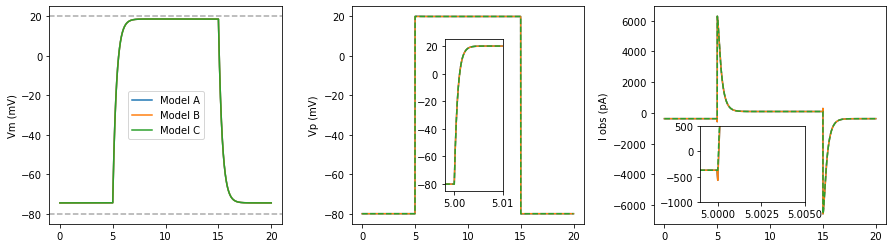

In [12]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.axhline(vlo, **kw)
ax.axhline(vhi, **kw)
ax.plot(dA.time(), dA['amp.Vm'], label='Model A')
ax.plot(dB.time(), dB['amp.Vm'], label='Model B')
ax.plot(dC.time(), dC['amp.Vm'], label='Model C')
ax.legend()

ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dA.time(), dA['amp.Vp'], label='Model A')
ax.plot(dB.time(), dB['amp.Vp'], label='Model B')
ax.plot(dC.time(), dC['amp.Vp'], '--', label='Model C')
ax = ax.inset_axes((0.4, 0.15, 0.25, 0.7))
ax.plot(dA.time(), dA['amp.Vp'], label='Model A')
ax.plot(dB.time(), dB['amp.Vp'], label='Model B')
ax.plot(dC.time(), dC['amp.Vp'], '--', label='Model C')
ax.set_xlim(4.998, 5.01)

ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dA['amp.I_obs'], label='Model A')
ax.plot(dB.time(), dB['amp.I_obs'], label='Model B')
ax.plot(dC.time(), dC['amp.I_obs'], '--', label='Model C')
ax = ax.inset_axes((0.2, 0.10, 0.45, 0.35))
ax.plot(dA.time(), dA['amp.I_obs'], label='Model A')
ax.plot(dB.time(), dB['amp.I_obs'], label='Model B')
ax.plot(dC.time(), dC['amp.I_obs'], '--', label='Model C')
ax.set_xlim(4.999, 5.005)
ax.set_ylim(-1000, 500)

plt.show()

Again, the models look very similar.

At the transitions, we see a slight difference between models A and B and model C:
In A and B, $V_c$ appears in the equation for $I_\text{obs}$, and so the output changes instantaneously when $V_c$ does.
In C we observe $V_o - V_p$, both of which change smoothly.

### Model C: (1, 3b, 5)

Just to check our maths, we can implement a model C using the Lei et al. formulation of (1, 3b, 5).

In [13]:
mD = myokit.parse_model('''
[[model]]
amp.Vm = -80 [mV]
amp.Vp = -80 [mV]
amp.I_obs = 0 [pA]

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
Rs = 15e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cp = 5 [pF] in [pF]
Rf = 0.5 [GOhm] in [GOhm]
Cf = 0.15 [pF] in [pF]
tau_amp = 20e-6 [ms] in [ms]
tau_c = tau_amp * (Cf + Cp) / Cf
    in [ms]
I = 5 [nS] * Vm
    in [pA]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Equation 1 (S2.10)
    in [mV]
dot(Vp) = (Vc - Vp) / tau_c : Equation 3b (S2.12)
    in [mV]
dot(I_obs) = (I + Cm * dot(Vm) + Cp * dot(Vp) - I_obs) / (Rf * Cf) : Equation 5 (S2.5 and S2.8)
    in [pA]
''')
mD.check_units(myokit.UNIT_STRICT)

In [14]:
sD = myokit.Simulation(mD, p)
sD.set_tolerance(tol, tol)
sD.pre(5)
dD = sD.run(20, log_interval=dt).npview()

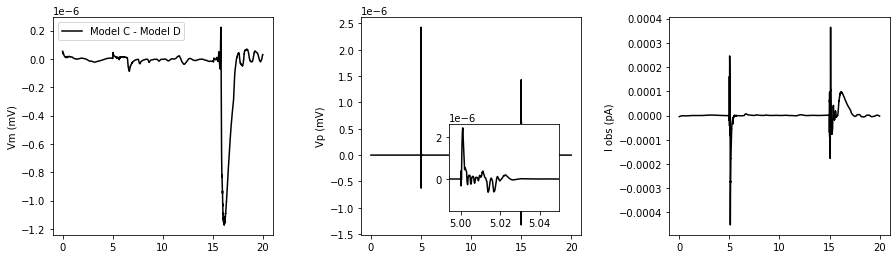

In [15]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.4)
ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.plot(dC.time(), dC['amp.Vm'] - dD['amp.Vm'], 'k', label='Model C - Model D')
ax.legend()
ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dC.time(), dC['amp.Vp'] - dD['amp.Vp'], 'k')
ax = ax.inset_axes((0.40, 0.11, 0.5, 0.4))
ax.plot(dC.time(), dC['amp.Vp'] - dD['amp.Vp'], 'k')
ax.set_xlim(4.994, 5.05)
ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dC['amp.I_obs'] - dD['amp.I_obs'], 'k')
plt.show()

A very small error is observed, which fluctuates rapidly.
This suggests the models are the same and the error is due to small differences in the solver's chosen step sizes.

(Adaptive step size algorithms may be a reason to prefer formulation D over C, as they place the output $I_text{obs}$ under the solver's control, instead of calculating it as a function of two error-controlled variables.)

### Cross-comparison

We can get a closer look at the differences by plotting them explicitly.
For $V_p$ and $I_\text{out}$ we'll zoom in on the first few $\mu$s.

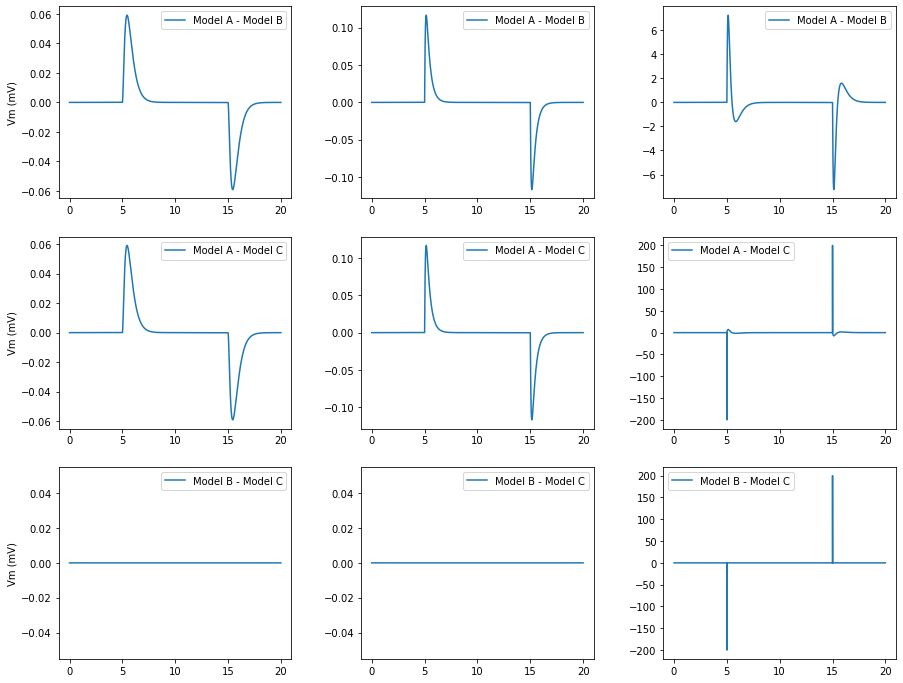

In [16]:
xlim = -0.005, 0.05

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(wspace=0.3)

ax11 = fig.add_subplot(3, 3, 1)
ax11.plot(dA.time(), dA['amp.Vm'] - dB['amp.Vm'], label='Model A - Model B')
ax21 = fig.add_subplot(3, 3, 4); ax.set_ylabel('Vm (mV)')
ax21.plot(dA.time(), dA['amp.Vm'] - dC['amp.Vm'], label='Model A - Model C')
ax31 = fig.add_subplot(3, 3, 7); ax.set_ylabel('Vm (mV)')
ax31.plot(dB.time(), dB['amp.Vm'] - dC['amp.Vm'], label='Model B - Model C')
ax12 = fig.add_subplot(3, 3, 2); ax.set_ylabel('Vp (mV)')
ax12.plot(dA.time(), dA['amp.Vp'] - dB['amp.Vp'], label='Model A - Model B')
ax22 = fig.add_subplot(3, 3, 5); ax.set_ylabel('Vp (mV)')
ax22.plot(dA.time(), dA['amp.Vp'] - dC['amp.Vp'], label='Model A - Model C')
ax32 = fig.add_subplot(3, 3, 8); ax.set_ylabel('Vp (mV)')
ax32.plot(dB.time(), dB['amp.Vp'] - dC['amp.Vp'], label='Model B - Model C')
ax13 = fig.add_subplot(3, 3, 3); ax.set_ylabel('I obs (mV)')
ax13.plot(dA.time(), dA['amp.I_obs'] - dB['amp.I_obs'], label='Model A - Model B')
ax23 = fig.add_subplot(3, 3, 6); ax.set_ylabel('I obs (mV)')
ax23.plot(dA.time(), dA['amp.I_obs'] - dC['amp.I_obs'], label='Model A - Model C')
ax33 = fig.add_subplot(3, 3, 9); ax.set_ylabel('I obs (mV)')
ax33.plot(dB.time(), dB['amp.I_obs'] - dC['amp.I_obs'], label='Model B - Model C')

for ax in (ax11, ax21, ax31):
    ax.set_ylabel('Vm (mV)')
for ax in (ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33):
    ax.legend()
    
plt.show()

Here, we see that

- There are minor differences between Model A and Models B and C, which are only visible when plotting the difference explicitly.
- In line with their shared equations, models B and C differ only in their prediction of $I_\text{obs}$ near discontinuities.

## Models A and C with a high parasitic capcitance

For Model A, we can calculate the damping factor as

\begin{align}
\zeta = \frac{\tau_a + R_fC_f}{\sqrt{\tau_a R_f (C_p+C_f)}}
\end{align}

In [17]:
Rf = 0.5         # GOhm
Cf = 0.15        # pF
Cp = 5           # pF (pF * GOhm = ms)
tau_amp = 20e-6  # ms

zeta = (tau_amp + Rf * Cf) / np.sqrt(tau_amp * Rf * (Cf + Cp))
# (ms + ms) / sqrt(ms * ms) = dimensionless

print(f'Zeta: {zeta}')

Zeta: 10.453782146431431


This is well above 1, so that the system is stable.

To see differences between the models, we can find an unstable situation.
For example, in a low-gain mode with $R_f = 5\text{M}\Omega$ and $C_p = 10$ pF:

In [18]:
Rf = 0.005
Cp = 10
zeta = (tau_amp + Rf * Cf) / np.sqrt(tau_amp * Rf * (Cf + Cp))
print(f'Zeta: {zeta}')

Zeta: 0.7642891671576164


In [28]:
new_Rf = 0.005
new_Cp = 10
sA.set_constant('amp.Cp', new_Cp)
sA.set_constant('amp.Rf', new_Rf)
sC.set_constant('amp.Cp', new_Cp)
sC.set_constant('amp.Rf', new_Rf)
sA.reset()
sC.reset()
dA = sA.run(7, log_interval=dt)
dC = sC.run(7, log_interval=dt)

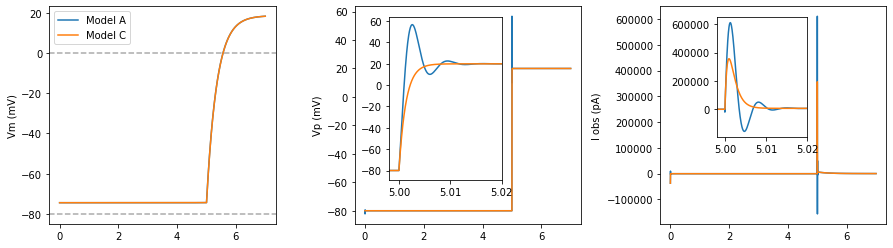

In [32]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.35)

ax = fig.add_subplot(1, 3, 1)
ax.set_ylabel('Vm (mV)')
ax.axhline(mA.get('amp.Vm').initial_value().eval(), **kw)
ax.axhline(mA.get('amp.Vc').eval(), **kw)
ax.plot(dA.time(), dA['amp.Vm'], label='Model A')
ax.plot(dC.time(), dC['amp.Vm'], label='Model C')
ax.legend()

ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('Vp (mV)')
ax.plot(dA.time(), dA['amp.Vp'])
ax.plot(dC.time(), dC['amp.Vp'])
ax = ax.inset_axes((0.15, 0.20, 0.5, 0.75))
ax.plot(dA.time(), dA['amp.Vp'])
ax.plot(dC.time(), dC['amp.Vp'])
ax.set_xlim(4.998, 5.02)

ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('I obs (pA)')
ax.plot(dA.time(), dA['amp.I_obs'])
ax.plot(dC.time(), dC['amp.I_obs'])
ax = ax.inset_axes((0.25, 0.40, 0.4, 0.55))
ax.plot(dA.time(), dA['amp.I_obs'])
ax.plot(dC.time(), dC['amp.I_obs'])
ax.set_xlim(4.998, 5.02)

plt.show()

Now we see the expected ringing behaviour in Model A, while the simplified equations in Model C show a simpler response.

## Conclusions

- Model A, which uses the op-amp equation from Sigworth 1995a, exhibits more complicated dynamics than Models B and C, which are based on a dominant-pole approximation of Model A.
- Model B is a Model A variant with an alternative op-amp equation.
- Model C can be formulated as a Model B variant with $V_\text{out} = V_o - V_p$.
- When using the default settings, the differences between the models appear neglible.
- Model A can be made to show unstable ringing behaviour.